In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append("../")
import pywt
from pywt import wavedecn
from PIL import Image, ImageOps
from structured_random_features.src.models.weights import V1_weights
from sklearn.linear_model import Lasso
from src.compress_sensing_library import reconstruct, generate_V1_variables, error_calculation

import seaborn as sns
import pandas as pd

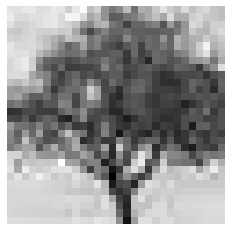

In [2]:
image_nm = 'image/tree_part1.jpg'
img = Image.open(os.path.join("../", image_nm))
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)

plt.axis('off')
plt.imshow(img_arr, 'gray')


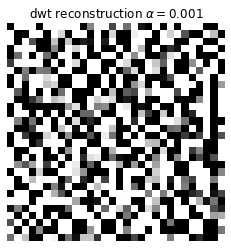

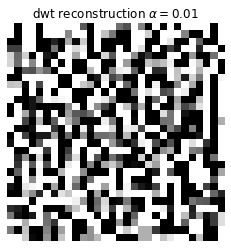

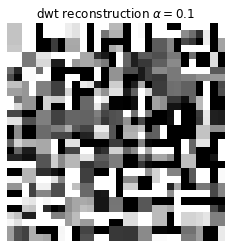

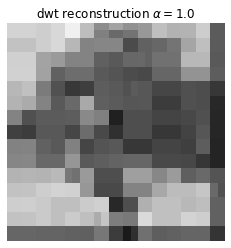

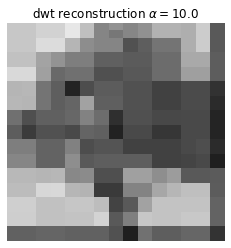

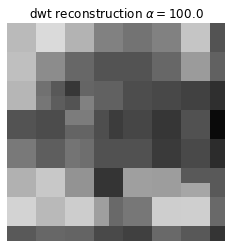

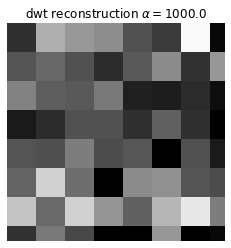

In [34]:
# Saves best Reconstruction
best_reconst = []

# Compute Samples
n, m = img_arr.shape
samp = np.floor(n * m * .2).astype(int)
rand_index = np.random.randint(0, n * m, samp)

num_cell = samp
sparse_freq = 2
cell_size = 5

C3D, y = generate_V1_variables(num_cell, cell_size, sparse_freq, img_arr)


# hyperparameter values
alpha_list = np.logspace(-3, 3, 7)
lv = 2
w = 'db1'

for alpha in alpha_list:
    # Determine theta size with one run of wavedecn
    dwt_sample = wavedecn(C3D[0], wavelet = w, level = lv, axes = [0, 1])
    coeff, coeff_slices, coeff_shapes = pywt.ravel_coeffs(dwt_sample)
    theta = np.zeros((len(C3D), len(coeff)))
    theta[0, :] = coeff 

    # Loop the wavedecn to fill theta
    for i in range(samp):
        theta_i = wavedecn(C3D[i], wavelet= w, level = lv, axes = [0, 1])
        theta[i, :] = pywt.ravel_coeffs(theta_i)[0]

    mini = Lasso(alpha = alpha, fit_intercept = False)
    mini.fit(theta, y)

    s = mini.coef_

    s_unravel = pywt.unravel_coeffs(s, coeff_slices, coeff_shapes)
    reconst = pywt.waverecn(s_unravel, w)
    plt.imshow(reconst, 'gray', vmin = 0, vmax = 255)
    
    plt.axis('off')
    plt.title(r'dwt reconstruction $\alpha = {alp}$'.format(alp = alpha))
    plt.show()
    
    # Saves the minimum error solution
    if (error_calculation(img_arr, reconst) < best_error):
        best_error = error_calculation(img_arr, reconst)
        best_reconst = reconst
        
#     plt.savefig("result/tree_part1/dwt/{alp}_reconst.png".format(alp = alpha).replace(" ", "_"), dpi = 300, transparent = True)

In [32]:
np.round(best_reconst)

array([[205., 205., 202., 202., 210., 210., 210., 210., 214., 214., 202.,
        202., 138., 138., 129., 129., 105., 105., 137., 137., 181., 181.,
        181., 181., 190., 190., 190., 190.,  96.,  96.],
       [205., 205., 202., 202., 210., 210., 210., 210., 214., 214., 202.,
        202., 138., 138., 129., 129., 105., 105., 137., 137., 181., 181.,
        181., 181., 190., 190., 190., 190.,  96.,  96.],
       [205., 205., 202., 202., 210., 210., 210., 210., 174., 174., 161.,
        161., 119., 119., 111., 111., 105., 105., 137., 137., 110., 110.,
        110., 110., 183., 183., 183., 183.,  96.,  96.],
       [205., 205., 202., 202., 210., 210., 210., 210., 174., 174., 161.,
        161., 119., 119., 111., 111., 105., 105., 137., 137., 110., 110.,
        110., 110., 183., 183., 183., 183.,  96.,  96.],
       [202., 202., 214., 214., 163., 163., 163., 163., 124., 124., 118.,
        118.,  92.,  92.,  92.,  92.,  85.,  85.,  85.,  85., 110., 110.,
        110., 110., 167., 167., 

In [23]:
dwt_sample = wavedecn(C3D[10], wavelet = w, level = lv)
coeff, coeff_slices1, coeff_shapes1 = pywt.ravel_coeffs(dwt_sample)
theta1 = np.zeros((len(C3D), len(coeff)))
theta1[0, :] = coeff 
print(coeff_slices1 == coeff_slices2)
print(coeff_slices2)

NameError: name 'coeff_slices2' is not defined

In [24]:
dwt_sample = wavedecn(C3D[100], wavelet = w, level = lv)
coeff, coeff_slices2, coeff_shapes2 = pywt.ravel_coeffs(dwt_sample)
theta2 = np.zeros((len(C3D), len(coeff)))
theta2[0, :] = coeff 
theta2.shape

(180, 900)

In [25]:
dwt_sample = wavedecn(C3D[88], wavelet = w, level = lv)
coeff, coeff_slices3, coeff_shapes3 = pywt.ravel_coeffs(dwt_sample)
theta3 = np.zeros((len(C3D), len(coeff)))
theta3[0, :] = coeff 
theta3.shape

(180, 900)

In [27]:
np.array_equal(theta1, theta2)

False

<AxesSubplot:>

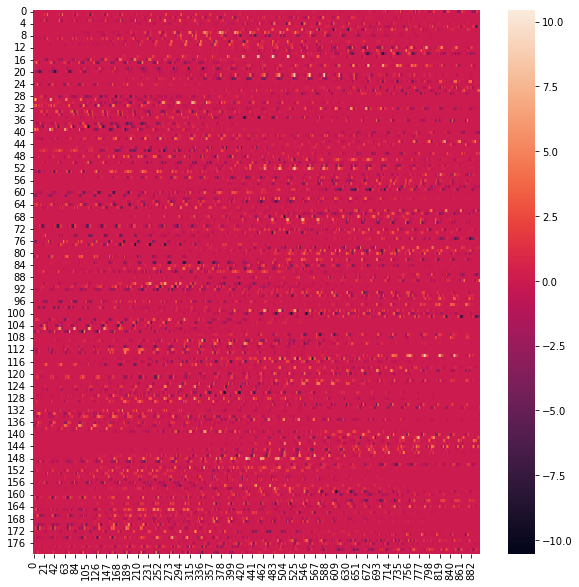

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(theta)

In [235]:
s

array([ 2.05847116e+03,  1.38598124e+03,  2.11566555e+03,  1.72138799e+03,
        2.65725225e+02, -0.00000000e+00,  1.76549669e+02,  1.11111457e+02,
        4.21135107e+02,  4.16936650e+02, -6.47317672e+01, -8.67206455e+01,
        1.43139073e+02, -0.00000000e+00,  5.26455791e+01,  0.00000000e+00,
        0.00000000e+00,  1.98760448e+00, -5.57181286e+01,  7.98804446e+01,
        4.08780704e+01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.15269812e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.08459412e+02, -7.85965792e+01,  1.32995535e+02,
        0.00000000e+00,  1.51517611e+02,  6.09015765e+00, -0.00000000e+00,
        2.80672984e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.56187498e+02, -2.22318240e+01, -2.31974321e+02, -1.50839268e+02,
        2.56903142e+02,  1.71575371e+02,  1.86756009e+02,  2.12996099e+02,
       -7.51674749e+01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -